# Zombie apokalypse
## Av Aksel og Julia

oppg 1, 2, 3
Her handler det om populasjonsvekst med en art.

Vi har satt at innvandringen er konstant uavhengig av hvor mange mennesker det er.

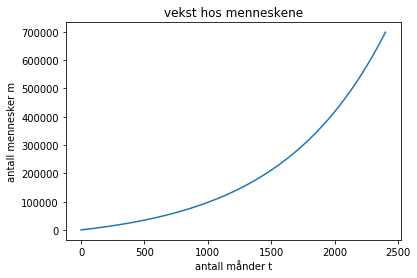

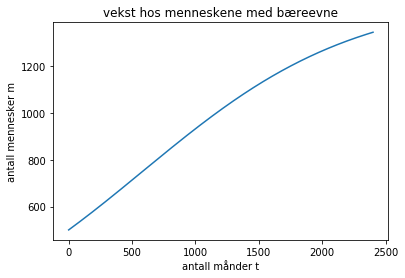

På den siste grafen ser vi at populasjonen vil flate ut når bæreevnen er nådd, som er på 1500. Vi ser at grafen vokser mye saktere fordi vi har en begrensning på plass, medisiner og mat.


In [50]:
from pylab import *
    
#Tidssteg    
t0 = 0      #Tid i måneder  
N = 100000   #Intervaller
tid = 2400       #Antall måneder
dt = tid/(N-1)  #Forskjell i tid
b = 1500    #Bæreevne

m0 = 500      #Antall mennesker ved t = 0
dr = 1/(12*70)      #dødsraten, tidsskalaen er målt i måneder, og man regner med menneskene lever i 70 år
fr = dr*2       #fødselsraten

innv = 50/(N/tid)   #innvandring per måned
k = fr - dr      #reproduskjonsrate


#Matriser
t = zeros(N)
m = zeros(N)
mder = zeros(N)

t[0] = t0
m[0] = m0


#Eulers metode
for i in range(N-1):
    mder[i] = k*m[i] 
    m[i+1] = m[i] + mder[i]*dt +innv 
    t[i+1] = t[i] + dt

plot(t, m)
title('vekst hos menneskene')
xlabel('antall månder t')
ylabel('antall mennesker m')
show()

for i in range(N-1):
    mder[i] = k*m[i] * (1 - m[i]/b)
    m[i+1] = m[i] + mder[i]*dt
    t[i+1] = t[i] + dt
    
plot(t,m)
title('vekst hos menneskene med bæreevne')
xlabel('antall månder t')
ylabel('antall mennesker m')
show()

print("På den siste grafen ser vi at populasjonen vil flate ut når bæreevnen er nådd, som er på 1500. Vi ser at grafen vokser mye saktere fordi vi har en begrensning på plass, medisiner og mat.")

oppg 4

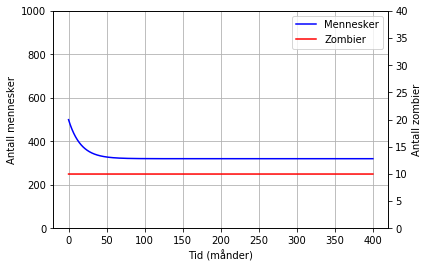

Her ser vi at i starten vil ca halvparten av menneskene dø, men det er like mange zombier siden de ikke kan dø eller reproduseres. Når det blir færre mennesker vil sannsynligheten for at de møter zombier synke, og færre mennesker dør. Som vi ser på grafen vil det komme til et punkt der det blir drept og dør like mange mennesker som blir født og kommer med innvandring. Grafen stabiliseres.


In [33]:
from pylab import *
   
#Tidssteg 
t0 = 0        #Tid i måneder
N = 100000    #Intervaller
tid = 400      #antall måneder

dt = tid/(N-1)
b = 1500      #Bæreevne


m0 = 500         #Antall mennesker ved t = 0
z0 = 10          #Antall zombier ved t = 0 
dr = 1/(12*70)      #dødsraten, tidsskalaen er målt i måneder, og man regner med menneskene lever i 70 år
fr = dr*2          #fødselsraten
mz =  0.005/(N/tid)      #menneske møter zombie
innv = 20/(N/tid)   #Innvandring
k = fr - dr        #reproduskjonsrate



#Matriser
t = zeros(N)
m = zeros(N)
mder = zeros(N)
z = zeros(N)


t[0] = t0
m[0] = m0
z[0] = z0


#Eulers metode
for i in range(N-1):
    mder[i] = k*m[i]
    m[i+1] = m[i] + (mder[i] * dt + innv) * (1 - m[i]/b) - mz * m[i] * z[i]
    z[i+1] = z[i]
    t[i+1] = t[i] + dt
    
    
#Plotting
fig = figure()
ax = fig.add_subplot(111)
data1 = ax.plot(t, m, '-b', label = 'Mennesker')
ax2 = ax.twinx()
data2 = ax2.plot(t, z, '-r', label = 'Zombier')

data = data1 + data2
datatittel = [l.get_label() for l in data]
ax.legend(data, datatittel, loc = 0)

ax.grid()
ax.set_xlabel('Tid (månder)')
ax.set_ylabel("Antall mennesker")
ax2.set_ylabel("Antall zombier")
ax2.set_ylim(0,40)
ax.set_ylim(0, 1000)
plt.show()


print("Her ser vi at i starten vil ca halvparten av menneskene dø, men det er like mange zombier siden de ikke kan dø eller reproduseres. Når det blir færre mennesker vil sannsynligheten for at de møter zombier synke, og færre mennesker dør. Som vi ser på grafen vil det komme til et punkt der det blir drept og dør like mange mennesker som blir født og kommer med innvandring. Grafen stabiliseres.")


oppg 5

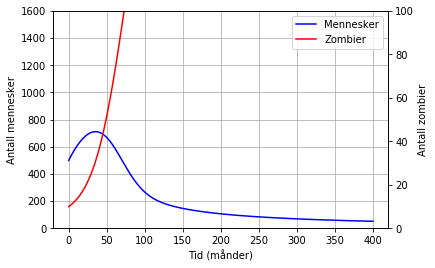

Her sier vi at 10% av menneskene som møter zombier blir bitt og blir selv til zombier, mens resten blir revet i fillebiter og dør. Her kan heller ikke zombiene dø, så grafen til zombiene går bratt oppover da den ikke har noe nedgang. Etterhvert vil det blir ganske få mennesker, men arten vil ikke dø ut, fordi det hele tiden kommer innvandring, og når det er få folk vil færre møte på zombier


In [52]:
from pylab import *
   
#Tidssteg 
t0 = 0       #Tid i måneder
N = 100000    #Intervaller
tid = 400     #antall måneder


dt = tid/(N-1)
b = 1500      #Bæreevne


m0 = 500
z0 = 10
dr = 1/(12*70)      #dødsraten, tidsskalaen er målt i måneder, og man regner med menneskene lever i 70 år
fr = dr*2          #fødselsraten
mz =  0.0005/(N/tid)      #menneske møter zombie
innv = 20/(N/tid)   #Innvandring
k = fr - dr        #reproduskjonsrate
bitt = 0.1      #andelen av de som møter zombie som blir til zombier


#Matriser
t = zeros(N)
m = zeros(N)
mder = zeros(N)
z = zeros(N)


t[0] = t0
m[0] = m0
z[0] = z0


#Eulers metode
for i in range(N-1):
    mder[i] = k*m[i]
    m[i+1] = m[i] + (mder[i] * dt + innv) * (1 - m[i]/b) - mz * m[i] * z[i]
    z[i+1] = z[i] + (mz * m[i] * z[i]) * bitt
    t[i+1] = t[i] + dt
    
    
#Plotting
fig = figure()
ax = fig.add_subplot(111)
data1 = ax.plot(t, m, '-b', label = 'Mennesker')
ax2 = ax.twinx()
data2 = ax2.plot(t, z, '-r', label = 'Zombier')

data = data1 + data2
datatittel = [l.get_label() for l in data]
ax.legend(data, datatittel, loc = 0)

ax.grid()
ax.set_xlabel('Tid (månder)')
ax.set_ylabel("Antall mennesker")
ax2.set_ylabel("Antall zombier")
ax2.set_ylim(0,100)
ax.set_ylim(0, b + 100)
plt.show()

print("Her sier vi at 10% av menneskene som møter zombier blir bitt og blir selv til zombier, mens resten blir revet i fillebiter og dør. Her kan heller ikke zombiene dø, så grafen til zombiene går bratt oppover da den ikke har noe nedgang. Etterhvert vil det blir ganske få mennesker, men arten vil ikke dø ut, fordi det hele tiden kommer innvandring, og når det er få folk vil færre møte på zombier")

oppg 6

Her sier vi at antall zombier som blir drept er uavhengig av hvor mange mennesker det er. Zombiene blir drept med feller eller kononer som er uavhengig av hvor mange mennesker det er. 


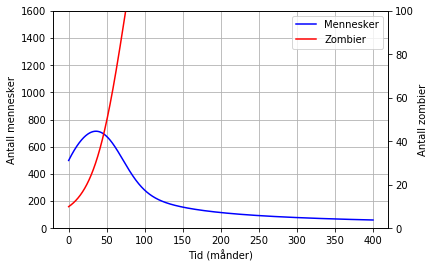

Vi ser at med zd = 0.0009 får vi veldig få døde zombier per måned, og grafen er veldig lik grafen uten døde zombier. Dersom vi leker litt med tallene, kan vi få fler zombier til å dø. Hvis vi for eksempel ganger zd med ti, vil vi tydeligere se at flere mennesker overlever, og om vi ganger med 100 ser vi at zombiene dør ut.  Menneskene har for få ressurser til å drepe masse zombier, og er mer opptatt av å overleve selv. 


In [60]:
from pylab import *
   
#Tidssteg  
t0 = 0      #Tid i måneder
N = 100000   #Intervaller
tid = 400     #antall måneder

dt = tid/(N-1)
b = 1500      #Bæreevne


m0 = 500       #Antall mennesker ved t = 0
z0 = 10        #Antall zombier ved t = 0
dr = 1/(12*70)      #dødsraten, tidsskalaen er målt i måneder, og man regner med menneskene lever i 70 år
fr = dr*2          #fødselsraten
mz =  0.0005/(N/tid)      #menneske møter zombie
innv = 20/(N/tid)   #Innvandring
k = fr - dr        #reproduskjonsrate
bitt = 0.1      #andelen av de som møter zombie som blir til zombier
zd = 0.0009/(N/tid)           #andel zombier drept


#Matriser
t = zeros(N)
m = zeros(N)
mder = zeros(N)
z = zeros(N)
zder = zeros(N)


t[0] = t0
m[0] = m0
z[0] = z0


#Euler metode
for i in range(N-1):
    mder[i] = k*m[i]
    m[i+1] = m[i] + (mder[i] * dt + innv) * (1 - m[i]/b) - mz * m[i] * z[i]
    z[i+1] = z[i] + zder[i] * dt + (mz * m[i] * z[i]) * bitt  - (zd  * z[i])
    t[i+1] = t[i] + dt
    

    
#Plotting
fig = figure()
ax = fig.add_subplot(111)
data1 = ax.plot(t, m, '-b', label = 'Mennesker')
ax2 = ax.twinx()
data2 = ax2.plot(t, z, '-r', label = 'Zombier')

data = data1 + data2
datatittel = [l.get_label() for l in data]
ax.legend(data, datatittel, loc = 0)

ax.grid()
ax.set_xlabel('Tid (månder)')
ax.set_ylabel("Antall mennesker")
ax2.set_ylabel("Antall zombier")
ax2.set_ylim(0,100)
ax.set_ylim(0, b + 100)
plt.show()

print("Vi ser at med zd = 0.0009 får vi veldig få døde zombier per måned, og grafen er veldig lik grafen uten døde zombier. Dersom vi leker litt med tallene, kan vi få fler zombier til å dø. Hvis vi for eksempel ganger zd med ti, vil vi tydeligere se at flere mennesker overlever, og om vi ganger med 100 ser vi at zombiene dør ut.  Menneskene har for få ressurser til å drepe masse zombier, og er mer opptatt av å overleve selv. ")

oppg 7
Her sier vi at dersom det blir mindre enn 200 mennesker vil Hilltop og Kingdom sende 100 mennesker, og kanoner slik at vi kan drepe dobbelt så mange zombier som det vi kunne før. 

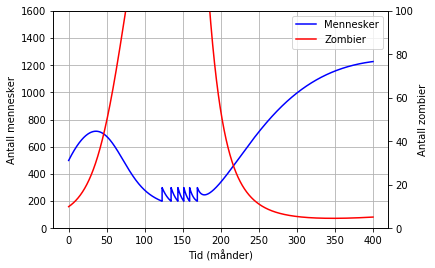

Her vil det i starten bli masse zombier og få mennesker, men med en gang det blir under 200 mennesker vil de få forsterkninger. De vil klare å drepe fler zombier. Det blir nå få zobier i fordhold til mennesker, og det vil stabiliseres til slutt, der det verken blir økning eller synkning av mennesker eller zombier.


In [64]:
from pylab import *
   
#Tidssteg 
t0 = 0      #Tid i måneder
N = 100000    #Intervaller
tid = 400     #Antall måneder

dt = tid/(N-1)
b = 1500      #Bæreevne


m0 = 500
z0 = 10
dr = 1/(12*70)      #dødsraten, tidsskalaen er målt i måneder, og man regner med menneskene lever i 70 år
fr = dr*2          #fødselsraten
mz =  0.0005/(N/tid)      #menneske møter zombie
innv = 20/(N/tid)   #Innvandring
k = fr - dr        #reproduskjonsrate
bitt = 0.1      #andelen av de som møter zombie som blir til zombier
zd = 0.0009/(N/tid)           #andel zombier drept


#Matriser
t = zeros(N)
m = zeros(N)
mder = zeros(N)
z = zeros(N)
zder = zeros(N)


t[0] = t0
m[0] = m0
z[0] = z0


#Eulers metode
for i in range(N-1):
    if m[i] < 200:
        m[i] = m[i] + 100
        zd = 2 * zd
    mder[i] = k*m[i]
    m[i+1] = m[i] + (mder[i] * dt + innv) * (1 - m[i]/b) - mz * m[i] * z[i]
    z[i+1] = z[i] + zder[i] * dt + (mz * m[i] * z[i]) * bitt  - (zd * z[i])
    t[i+1] = t[i] + dt
    

    
#Plotting
fig = figure()
ax = fig.add_subplot(111)
data1 = ax.plot(t, m, '-b', label = 'Mennesker')
ax2 = ax.twinx()
data2 = ax2.plot(t, z, '-r', label = 'Zombier')

data = data1 + data2
datatittel = [l.get_label() for l in data]
ax.legend(data, datatittel, loc = 0)

ax.grid()
ax.set_xlabel('Tid (månder)')
ax.set_ylabel("Antall mennesker")
ax2.set_ylabel("Antall zombier")
ax2.set_ylim(0,100)
ax.set_ylim(0, b + 100)
plt.show()

print("Her vil det i starten bli masse zombier og få mennesker, men med en gang det blir under 200 mennesker vil de få forsterkninger. De vil klare å drepe fler zombier. Det blir nå få zobier i fordhold til mennesker, og det vil stabiliseres til slutt, der det verken blir økning eller synkning av mennesker eller zombier.")
      